## Context
* "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

## Content
* Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

#### The data set includes information about:

* Dataset is taken from https://www.kaggle.com/blastchar/telco-customer-churn
* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

## Inspiration
To explore this type of models and learn more about the subject.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.drop(['customerID'], axis = 1, inplace=True)

In [5]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


* No null entries

In [7]:
# unique entries in each column
for column in df:
    print(f'{column}: {df[column].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [8]:
# Replacing 'No phone service' to 'No' in 'MultipleLines'
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

In [9]:
df['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
cols_with_No_internet_service = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                 'StreamingTV', 'StreamingMovies']

for col in cols_with_No_internet_service:
    df[col] = df[col].replace('No internet service', 'No')

In [12]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [13]:
# hanging total charges type from string to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
df['TotalCharges'].isnull().sum()

11

In [15]:
df[df['TotalCharges'].isnull()==True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


* After converting to numbers, we get 11 nan values in 'TotalCharges'. All of the instaces are for 'No' churn. As the number of nan values are lower, and 'No' churn category is much higher than 'yes' churn category, we will remove these instances

In [16]:
# import warnings
# warnings.simplefilter(action='ignore', category='FutureWarning')

/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Churn', ylabel='count'>

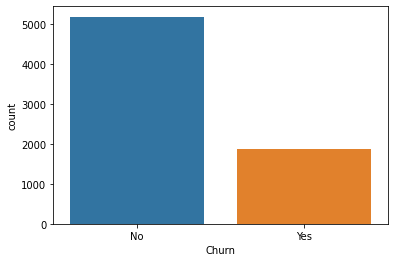

In [17]:
sns.countplot(df['Churn'])

In [18]:
df1 = df[~df['TotalCharges'].isnull()==True]

In [19]:
df1.shape

(7032, 20)

In [20]:
df_cat = df1.select_dtypes(include='object')
df_num = df1.select_dtypes(exclude='object')


In [21]:
df_cat_cols = df_cat.columns
df_cat.shape

(7032, 16)

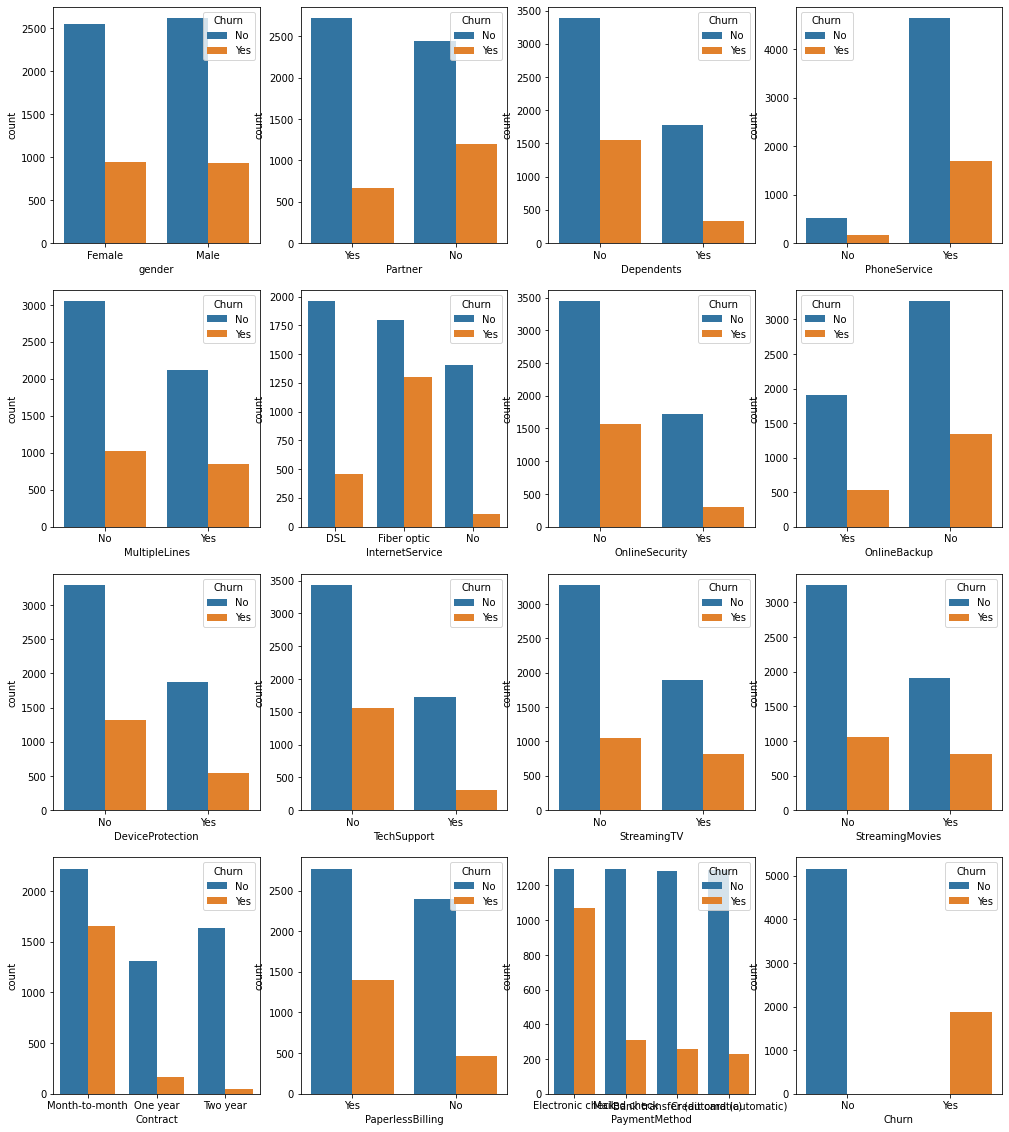

In [22]:
plt.figure(figsize=(17,20))
i = 1
for cols in df_cat:
    plt.subplot(4,4,i)
    sns.countplot(x=cols, hue='Churn', data=df1)
    i+=1
plt.show()

In [23]:
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

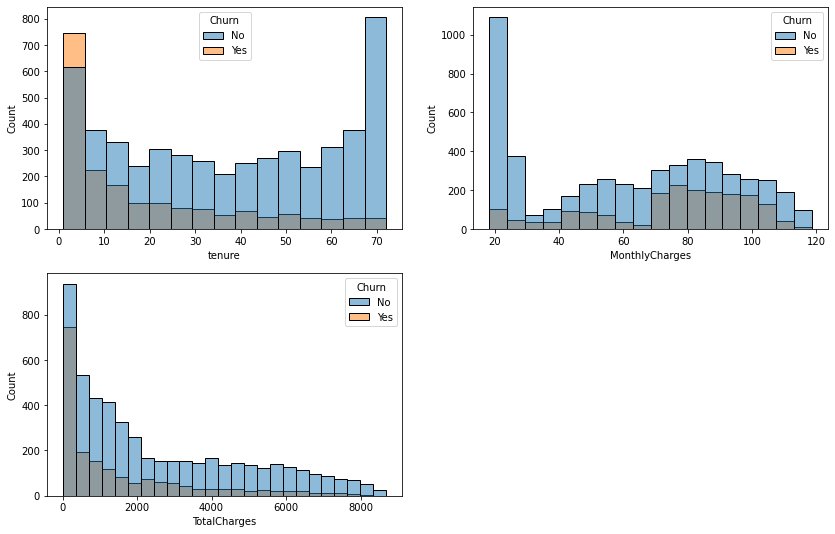

In [24]:
plt.figure(figsize=(14,9))
plt.subplot(2,2,1)
sns.histplot(data=df1, x='tenure', hue='Churn')
plt.subplot(2,2,2)
sns.histplot(data=df1, x='MonthlyCharges', hue='Churn')
plt.subplot(2,2,3)
sns.histplot(data=df1, x='TotalCharges', hue='Churn')

* All of the numerical features may have effect in Churn prediction as the distributions are different churn and no charn instances.
* Customers with higher tenure tends to be in no churn category.
* Those who pays higher mothly charges tends to be in churn category.
* For total charges it is similar in both category.

In [25]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
for cols in df1:
    print(f'{cols}: {df1[cols].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


In [27]:
df1['gender']= df1['gender'].replace({'Female':0, 'Male':1})

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

In [32]:
for col in yes_no_cols:
    df1[col] = df1[col].replace({'Yes':0, 'No':1})

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
for cols in df1:
    print(f'{cols}: {df1[cols].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [0 1]
Dependents: [1 0]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [1 0]
MultipleLines: [1 0]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [1 0]
OnlineBackup: [0 1]
DeviceProtection: [1 0]
TechSupport: [1 0]
StreamingTV: [1 0]
StreamingMovies: [1 0]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [0 1]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [1 0]


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 


* 3 object features have more than 2 categoris. We will use pandas get_dummies method for one hot encoding

In [36]:
df2 = pd.get_dummies(data= df1, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [38]:
df1.shape, df2.shape

((7032, 20), (7032, 27))

In [39]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,1,1,1,0,1,...,1,0,0,1,0,0,0,0,1,0
1,1,0,1,1,34,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,1,1,2,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,1,1,45,1,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,1,1,2,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0


In [41]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [48]:
cols_to_scale=['tenure', 'MonthlyCharges', 'TotalCharges']

In [51]:
df2[cols_to_scale].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [40]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [52]:
df2[cols_to_scale] = sc.fit_transform(df2[cols_to_scale])

In [53]:
for col

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,0.000000,1,1,1,0,1,...,1,0,0,1,0,0,0,0,1,0
1,1,0,1,1,0.464789,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,1,1,0.014085,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,1,1,0.619718,1,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,1,1,0.014085,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0


In [55]:
for cols in df2:
    print(f'{cols}: {df2[cols].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [0 1]
Dependents: [1 0]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [1 0]
MultipleLines: [1 0]
OnlineSecurity: [1 0]
OnlineBackup: [0 1]
DeviceProtection: [1 0]
TechSupport: [

In [56]:
X = df2.drop(['Churn'], axis=1).values
y = df2['Churn'].values

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [59]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 26), (1407, 26), (5625,), (1407,))

### Buliding ANN model

In [58]:
from tensorflow import keras

In [61]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                702       
                                                                 
 dense_1 (Dense)             (None, 15)                405       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [64]:
hist = model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.4098 - accuracy: 0.8075
Epoch 2/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.4106 - accuracy: 0.8050
Epoch 3/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.4089 - accuracy: 0.8100
Epoch 4/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.4055 - accuracy: 0.8098
Epoch 5/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.4047 - accuracy: 0.8107
Epoch 6/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.4040 - accuracy: 0.8110
Epoch 7/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.4017 - accuracy: 0.8124
Epoch 8/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.4009 - accuracy: 0.8133
Epoch 9/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3996 - accuracy: 0.8137
Epoch 10/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.398

176/176 [==============================] - 1s 3ms/step - loss: 0.3538 - accuracy: 0.8389
Epoch 81/1000
176/176 [==============================] - 0s 3ms/step - loss: 0.3529 - accuracy: 0.8418
Epoch 82/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3517 - accuracy: 0.8411
Epoch 83/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3536 - accuracy: 0.8380
Epoch 84/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3499 - accuracy: 0.8416
Epoch 85/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3520 - accuracy: 0.8386
Epoch 86/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3516 - accuracy: 0.8379
Epoch 87/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3486 - accuracy: 0.8421
Epoch 88/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3484 - accuracy: 0.8428
Epoch 89/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3482 - a

176/176 [==============================] - 1s 3ms/step - loss: 0.3252 - accuracy: 0.8526
Epoch 160/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3247 - accuracy: 0.8494
Epoch 161/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3237 - accuracy: 0.8539
Epoch 162/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3237 - accuracy: 0.8494
Epoch 163/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3236 - accuracy: 0.8514
Epoch 164/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3235 - accuracy: 0.8517
Epoch 165/1000
176/176 [==============================] - 0s 3ms/step - loss: 0.3233 - accuracy: 0.8532
Epoch 166/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3224 - accuracy: 0.8535
Epoch 167/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3217 - accuracy: 0.8551
Epoch 168/1000
176/176 [==============================] - 1s 3ms/step - loss: 0

176/176 [==============================] - 1s 3ms/step - loss: 0.3052 - accuracy: 0.8581
Epoch 238/1000
176/176 [==============================] - 0s 3ms/step - loss: 0.3057 - accuracy: 0.8619
Epoch 239/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3045 - accuracy: 0.8626
Epoch 240/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3057 - accuracy: 0.8622
Epoch 241/1000
176/176 [==============================] - 0s 3ms/step - loss: 0.3043 - accuracy: 0.8619
Epoch 242/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3051 - accuracy: 0.8633
Epoch 243/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3066 - accuracy: 0.8649
Epoch 244/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.3069 - accuracy: 0.8571
Epoch 245/1000
176/176 [==============================] - 0s 3ms/step - loss: 0.3057 - accuracy: 0.8644
Epoch 246/1000
176/176 [==============================] - 1s 3ms/step - loss: 0

176/176 [==============================] - 0s 3ms/step - loss: 0.2939 - accuracy: 0.8674
Epoch 316/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2942 - accuracy: 0.8661
Epoch 317/1000
176/176 [==============================] - 0s 3ms/step - loss: 0.2949 - accuracy: 0.8670
Epoch 318/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2966 - accuracy: 0.8672
Epoch 319/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2945 - accuracy: 0.8695
Epoch 320/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2947 - accuracy: 0.8670
Epoch 321/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2968 - accuracy: 0.8649
Epoch 322/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2920 - accuracy: 0.8652
Epoch 323/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2948 - accuracy: 0.8690
Epoch 324/1000
176/176 [==============================] - 1s 3ms/step - loss: 0

176/176 [==============================] - 1s 3ms/step - loss: 0.2864 - accuracy: 0.8711
Epoch 394/1000
176/176 [==============================] - 0s 3ms/step - loss: 0.2836 - accuracy: 0.8716
Epoch 395/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2862 - accuracy: 0.8667
Epoch 396/1000
176/176 [==============================] - 1s 4ms/step - loss: 0.2865 - accuracy: 0.8681
Epoch 397/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2862 - accuracy: 0.8704
Epoch 398/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2833 - accuracy: 0.8731
Epoch 399/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2849 - accuracy: 0.8720
Epoch 400/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2837 - accuracy: 0.8708
Epoch 401/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2852 - accuracy: 0.8692
Epoch 402/1000
176/176 [==============================] - 1s 3ms/step - loss: 0

176/176 [==============================] - 1s 3ms/step - loss: 0.2782 - accuracy: 0.8736
Epoch 472/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2773 - accuracy: 0.8775
Epoch 473/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2782 - accuracy: 0.8716
Epoch 474/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2785 - accuracy: 0.8780
Epoch 475/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2773 - accuracy: 0.8756
Epoch 476/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2773 - accuracy: 0.8764
Epoch 477/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2758 - accuracy: 0.8773
Epoch 478/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2778 - accuracy: 0.8750
Epoch 479/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2777 - accuracy: 0.8748
Epoch 480/1000
176/176 [==============================] - 1s 3ms/step - loss: 0

176/176 [==============================] - 1s 3ms/step - loss: 0.2731 - accuracy: 0.8764
Epoch 550/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2736 - accuracy: 0.8761
Epoch 551/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2712 - accuracy: 0.8804
Epoch 552/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2721 - accuracy: 0.8775
Epoch 553/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2692 - accuracy: 0.8812
Epoch 554/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2713 - accuracy: 0.8800
Epoch 555/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2720 - accuracy: 0.8786
Epoch 556/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2682 - accuracy: 0.8788
Epoch 557/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2717 - accuracy: 0.8802
Epoch 558/1000
176/176 [==============================] - 1s 3ms/step - loss: 0

176/176 [==============================] - 1s 3ms/step - loss: 0.2688 - accuracy: 0.8830
Epoch 628/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2683 - accuracy: 0.8809
Epoch 629/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2663 - accuracy: 0.8836
Epoch 630/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2653 - accuracy: 0.8805
Epoch 631/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2655 - accuracy: 0.8816
Epoch 632/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2625 - accuracy: 0.8805
Epoch 633/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2657 - accuracy: 0.8798
Epoch 634/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2653 - accuracy: 0.8800
Epoch 635/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2669 - accuracy: 0.8811
Epoch 636/1000
176/176 [==============================] - 1s 3ms/step - loss: 0

176/176 [==============================] - 1s 3ms/step - loss: 0.2656 - accuracy: 0.8825
Epoch 706/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2617 - accuracy: 0.8857
Epoch 707/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2628 - accuracy: 0.8830
Epoch 708/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2615 - accuracy: 0.8866
Epoch 709/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2613 - accuracy: 0.8820
Epoch 710/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2633 - accuracy: 0.8816
Epoch 711/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2610 - accuracy: 0.8832
Epoch 712/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2598 - accuracy: 0.8852
Epoch 713/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2607 - accuracy: 0.8885
Epoch 714/1000
176/176 [==============================] - 1s 3ms/step - loss: 0

176/176 [==============================] - 1s 3ms/step - loss: 0.2594 - accuracy: 0.8839
Epoch 784/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2589 - accuracy: 0.8828
Epoch 785/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2605 - accuracy: 0.8830
Epoch 786/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2586 - accuracy: 0.8834
Epoch 787/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2576 - accuracy: 0.8825
Epoch 788/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2569 - accuracy: 0.8843
Epoch 789/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2560 - accuracy: 0.8844
Epoch 790/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2580 - accuracy: 0.8825
Epoch 791/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2585 - accuracy: 0.8860
Epoch 792/1000
176/176 [==============================] - 1s 3ms/step - loss: 0

176/176 [==============================] - 1s 3ms/step - loss: 0.2562 - accuracy: 0.8841
Epoch 862/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2568 - accuracy: 0.8832
Epoch 863/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2592 - accuracy: 0.8798
Epoch 864/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2570 - accuracy: 0.8866
Epoch 865/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2578 - accuracy: 0.8821
Epoch 866/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2568 - accuracy: 0.8844
Epoch 867/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2555 - accuracy: 0.8868
Epoch 868/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2553 - accuracy: 0.8860
Epoch 869/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2554 - accuracy: 0.8868
Epoch 870/1000
176/176 [==============================] - 1s 3ms/step - loss: 0

176/176 [==============================] - 1s 3ms/step - loss: 0.2543 - accuracy: 0.8880
Epoch 940/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2515 - accuracy: 0.8903
Epoch 941/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2537 - accuracy: 0.8844
Epoch 942/1000
176/176 [==============================] - 0s 3ms/step - loss: 0.2534 - accuracy: 0.8894
Epoch 943/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2540 - accuracy: 0.8891
Epoch 944/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2511 - accuracy: 0.8876
Epoch 945/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2532 - accuracy: 0.8892
Epoch 946/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2514 - accuracy: 0.8894
Epoch 947/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.2549 - accuracy: 0.8852
Epoch 948/1000
176/176 [==============================] - 1s 3ms/step - loss: 0

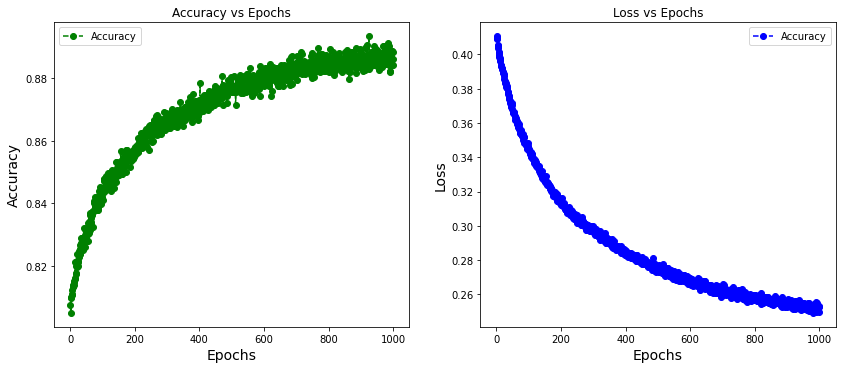

In [66]:
# Pltting Accuracy and loss
acc = hist.history['accuracy']
loss = hist.history['loss']
epochs = range(1, len(acc)+1)

fig, ax = plt.subplots(1,2, figsize=(14,5.6))

ax[0].plot(epochs, acc, 'go--', label='Accuracy')
ax[0].set_xlabel("Epochs", fontsize=14)
ax[0].set_ylabel("Accuracy", fontsize=14)
ax[0].set_title("Accuracy vs Epochs")
ax[0].legend()

ax[1].plot(epochs, loss, 'bo--', label='Accuracy')
ax[1].set_xlabel("Epochs", fontsize=14)
ax[1].set_ylabel("Loss", fontsize=14)
ax[1].set_title("Loss vs Epochs")
ax[1].legend()

plt.show()

In [69]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.8527 - accuracy: 0.7434


[0.8527255058288574, 0.743425726890564]

In [70]:
y_pred = model.predict(X_test)

In [76]:
y_pred

array([[0.98530734],
       [0.12725946],
       [0.99996465],
       ...,
       [0.3172341 ],
       [0.29246014],
       [0.01094446]], dtype=float32)

In [78]:
y_pred_binary = []
for element in y_pred:
    if element<0.5:
        y_pred_binary.append(0)
    else:
        y_pred_binary.append(1)

In [79]:
y_pred_binary

[1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,


In [74]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, classification_report

In [80]:
cm = confusion_matrix(y_test, y_pred_binary)
cm

array([[202, 206],
       [155, 844]])

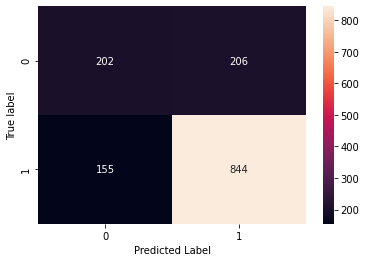

In [84]:
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel("True label")
plt.xlabel("Predicted Label")
plt.show()

In [85]:
f1_score(y_test, y_pred_binary)

0.8238164958516349

In [86]:
recall_score(y_test, y_pred_binary)

0.8448448448448449

In [87]:
precision_score(y_test, y_pred_binary)

0.8038095238095239

In [91]:
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.57      0.50      0.53       408
           1       0.80      0.84      0.82       999

    accuracy                           0.74      1407
   macro avg       0.68      0.67      0.68      1407
weighted avg       0.73      0.74      0.74      1407

